<a href="https://colab.research.google.com/github/sgeorge2012/ECGR4105/blob/main/Prophet.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

INFO:prophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


DEBUG:cmdstanpy:input tempfile: /tmp/tmpu8ikb00b/me20z13l.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpu8ikb00b/h1sc1m99.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.11/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=53035', 'data', 'file=/tmp/tmpu8ikb00b/me20z13l.json', 'init=/tmp/tmpu8ikb00b/h1sc1m99.json', 'output', 'file=/tmp/tmpu8ikb00b/prophet_modelz9449u0h/prophet_model-20250506154733.csv', 'method=optimize', 'algorithm=newton', 'iter=10000']
15:47:33 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
15:47:34 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
<ipython-input-2-63b98ec1f513>:28: FutureWarning: 'Y' is deprecated and will be removed in a future version, please use 'YE' instead.
  future_years = pd.date_range(start='2024', periods=12, freq='Y')  # e.g. 2024–2035


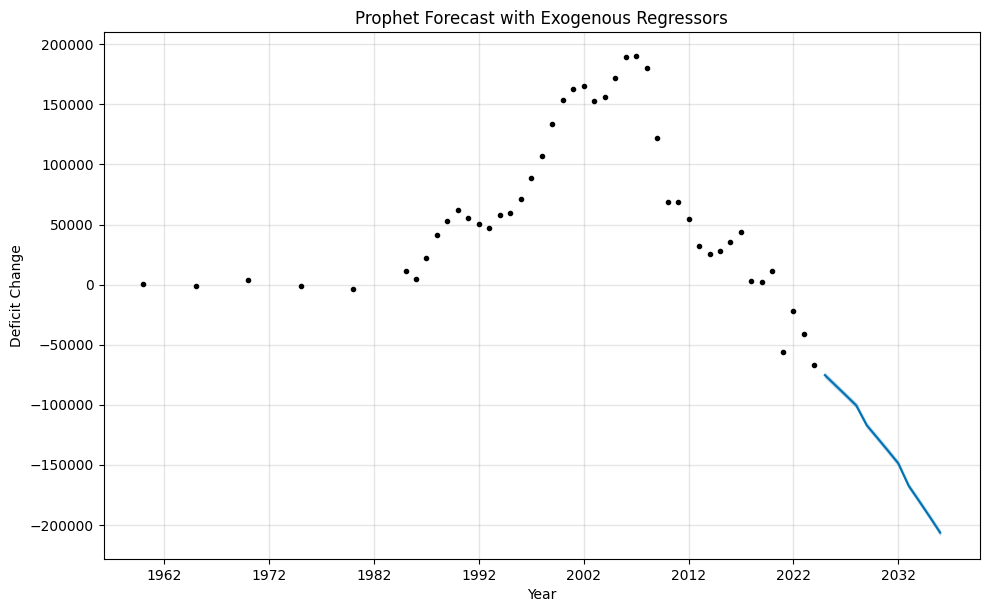

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

import numpy as np
import pandas as pd
from prophet import Prophet
import matplotlib.pyplot as plt

df = pd.read_csv('/content/drive/My Drive/Colab Notebooks/Merged_Social_Security.csv')

df['ds'] = pd.to_datetime(df['year'], format='%Y')
df['y']  = df['Change']

m = Prophet()
for reg in ['Cost','Income','life_expectancy','Workers','Beneficiaries','Unemployment','Birth_Rate']:
    m.add_regressor(reg)

m.fit(df[['ds','y','Cost','Income','life_expectancy','Workers','Beneficiaries','Unemployment','Birth_Rate']])

future_years = pd.date_range(start='2024', periods=12, freq='Y')

future = pd.DataFrame({'ds': future_years})

last = df.iloc[-1]
future['Cost']            = last['Cost']           * (1.03 ** np.arange(1, len(future)+1))
future['Income']          = last['Income']         * (1.025** np.arange(1, len(future)+1))
future['life_expectancy'] = last['life_expectancy'] + 0.1 * np.arange(1, len(future)+1)
future['Workers']         = last['Workers']        * (1.005** np.arange(1, len(future)+1))
future['Beneficiaries']   = last['Beneficiaries']  * (1.01 ** np.arange(1, len(future)+1))
future['Unemployment']    = last['Unemployment']
future['Birth_Rate']      = last['Birth_Rate']

forecast = m.predict(future)

fig = m.plot(forecast)
plt.title("Prophet Forecast with Exogenous Regressors")
plt.xlabel("Year")
plt.ylabel("Deficit Change")
plt.show()